<div style='background-color: #87ceeb;
    border: 0.5em solid black;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Activité</h2>
    <h1>Ensembles de Mandelbrot et de Julia</h1>
</div>

Cette activité s'adresse aux élèves suivant l'option mathématiques expertes. Son objectif est de définir et d'utiliser une classe `Complexe` pour dessiner l'[ensemble de Mandelbrot](https://fr.wikipedia.org/wiki/Ensemble_de_Mandelbrot) et les [ensembles de Julia](https://fr.wikipedia.org/wiki/Ensemble_de_Julia).

<img src='https://ntoulzac.github.io/Cours-NSI-Terminale/prog_objet/images/mandelbrot.png' width="50%">

**(1)** 💻 Définir une classe `Complexe` dont les instances possèdent :
- les attributs :
    - `re` (flottant : partie réelle du nombre complexe),
    - `im` (flottant : partie imaginaire du nombre complexe),
- les méthodes :
    - `module` (renvoie un flottant, le module du nombre complexe),
    - `__add__` (renvoie une instance de la classe Complexe, la somme de deux nombres complexes), et
    - `__mul__` (renvoie une instance de la classe Complexe, le produit de deux nombres complexes).

On rappelle que, si un complexe $z$ a pour partie réelle $x$ et pour partie imaginaire $y$, alors le module de $z$ est :

$$|z| = \sqrt{x^2 + y^2}$$

D'autre part, la somme et le produit de deux complexes $z_1 = x_1 + i y_1$ et $z_2 = x_2 + i y_2$ se calculent de la façon suivante :

$$z_1 + z_2 = (x_1 + x_2) + i(y_1 + y_2)$$

$$z_1 z_2 = (x_1 x_2 - y_1 y_2) + i(x_1 y_2 + x_2 y_1)$$

In [1]:
class Complexe:
    def __init__(self, x, y):
        self.re = x
        self.im = y
    
    def module(self):
        return (self.re**2 + self.im**2)**0.5

    def __add__(self, other):
        return Complexe(self.re + other.re, self.im + other.im)
    
    def __mul__(self, other):
        return Complexe(self.re*other.re - self.im*other.im, self.re*other.im + self.im*other.re)

$c$ étant un nombre complexe, on considère la suite complexe telle que $z_0 = 0$ et, pour tout $n \geq 0$, $z_{n+1} = z_n^2 + c$.

Le point d'affixe $c$ appartient à l'ensemble de Mandelbrot si et seulement si cette suite est bornée.

Pour dessiner une approximation de l'ensemble de Mandelbrot, on retient le critère suivant : le point d'affixe `c` appartient à l'ensemble si aucun des 100 premiers termes de la suite n'a un module strictement supérieur à 2.

**(2)** 💻 Compléter la définition de la fonction `dans_mandelbrot` définie ci-dessous. 

In [2]:
def dans_mandelbrot(c):
    """
    Détermine si le point d'affixe c appartient à une approximation de l'ensemble de Mandelbrot.
    - Entrée : c (instance de la classe Complexe)
    - Sortie : (booléen, True si le point d'affixe c est dans l'ensemble, False sinon)
    """
    n = 0
    z = Complexe(0, 0)
    for n in range(99):
        z = z*z + c
        if z.module() > 2:
            return False
    return True

Les deux cellules ci-dessous permettent :
- de définir deux tableaux `abscisses` et `ordonnees` contenant les coordonnées de points appartenant à (une approximation de) l'ensemble de Mandelbrot,
- d'afficher cet ensemble de points grâce au module `matplotlib`.

In [3]:
abscisses = []
ordonnees = []

nb_col = 500
nb_lig = 400

for col in range(nb_col):
    for lig in range(nb_lig):
        x = -2 + 2.5*col/nb_col
        y = -1 + 2*lig/nb_lig
        c = Complexe(x, y)
        if dans_mandelbrot(c):
            abscisses.append(x)
            ordonnees.append(y)

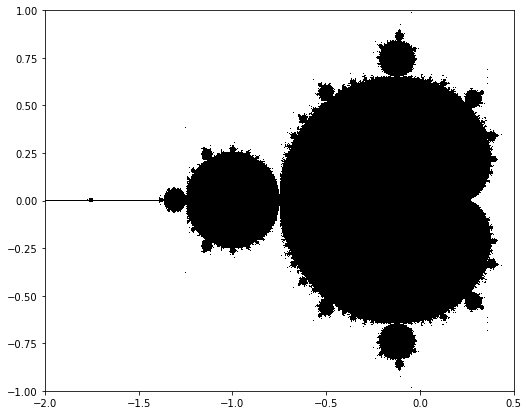

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8.4, 7))
plt.xlim(-2, 0.5)
plt.ylim(-1, 1)
plt.plot(abscisses, ordonnees, 'k,')

plt.show()

<div style='background-color: #87ceeb;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Pour aller plus loin...</h2>
</div>

$c$ étant un nombre complexe donné, on considère les suites complexes telles que, pour tout $n \geq 0$, $z_{n+1} = z_n^2 + c$.

Le point d'affixe $z_0$ appartient à l'ensemble de Julia de paramètre $c$ si et seulement la suite de premier terme $z_0$ est bornée.

<table>
    <tr>
        <td><img src='https://ntoulzac.github.io/Cours-NSI-Terminale/prog_objet/images/julia0.png'>
            <center><br><i>Ensemble de Julia<br>de paramètre </i><code>Complexe(-1, 0)</code></center></td>
        <td><img src='https://ntoulzac.github.io/Cours-NSI-Terminale/prog_objet/images/julia1.png'>
            <center><br><i>Ensemble de Julia<br>de paramètre </i><code>Complexe(0.3, 0.5)</code></center></td>
        <td><img src='https://ntoulzac.github.io/Cours-NSI-Terminale/prog_objet/images/julia2.png'>
            <center><br><i>Ensemble de Julia<br>de paramètre </i><code>Complexe(0.285, 0.013)</code></center></td>
    </tr>
</table>

Pour dessiner une approximation de l'ensemble de Julia de paramètre $c$, on retient le critère suivant : le point d'affixe `z_0` appartient à l'ensemble si aucun des 100 premiers termes de la suite n'a un module strictement supérieur à 2.

**(3)** 💻 Définir une fonction `dans_julia` permettant de savoir si le point d'affixe `z0` appartient ou non à (une approximation de) l'ensemble de Julia de paramètre `c`.

In [5]:
def dans_julia(c, z0):
    """
    Détermine si le point d'affixe z0 appartient à une approximation de l'ensemble de Julia
    de paramètre c.
    - Entrée : c, z0 (instances de la classe Complexe)
    - Sortie : (booléen, True si le point d'affixe z0 est dans l'ensemble de Julia, False sinon)
    """
    n = 0
    z = z0
    for n in range(99):
        z = z*z + c
        if z.module() > 2:
            return False
    return True

**(4)** 💻 Afficher l'ensemble de Julia de paramètre `c` grâce au module `matplotlib`.

In [6]:
c = Complexe(-0.8, 0.165)
# c = Complexe(-0.123, 0.745)

In [7]:
abscisses = []
ordonnees = []
nb_col = 400
nb_lig = 400
for col in range(nb_col):
    for lig in range(nb_lig):
        x = -1.5 + 3*col/nb_col
        y = -1.5 + 3*lig/nb_lig
        z0 = Complexe(x, y)
        if dans_julia(c, z0):
            abscisses.append(x)
            ordonnees.append(y)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 7))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.plot(abscisses, ordonnees, 'k,')

plt.show()

<table>
    <tr>
        <td><img src='https://ntoulzac.github.io/Cours-NSI-Terminale/prog_objet/images/julia3.png'>
            <center><br><i>Ensemble de Julia<br>de paramètre </i><code>Complexe(-0.8, 0.165)</code></center></td>
        <td><img src='https://ntoulzac.github.io/Cours-NSI-Terminale/prog_objet/images/julia4.png'>
            <center><br><i>Ensemble de Julia<br>de paramètre </i><code>Complexe(-0.123, 0.745)</code></center></td>
    </tr>
</table>